# Coesão Partidária
### Análise consolidada dos indicadores

Utilizando dados dos discursos do Grande Expediente e dos votos de proposições (PL, PLP, MPV, PEC), removidas votações com diferença inferior a 10%

In [1]:
import pandas as pd

Carregando dados dos indicadores de coesão sobre as votações

In [2]:
# Carregando dados de votações
df_2010v = pd.read_csv('score/score_votos_2010.csv', sep=';')
df_2011v = pd.read_csv('score/score_votos_2011.csv', sep=';')
df_2012v = pd.read_csv('score/score_votos_2012.csv', sep=';')
df_2013v = pd.read_csv('score/score_votos_2013.csv', sep=';')
df_2014v = pd.read_csv('score/score_votos_2014.csv', sep=';')
df_2015v = pd.read_csv('score/score_votos_2015.csv', sep=';')
df_2016v = pd.read_csv('score/score_votos_2016.csv', sep=';')
df_2017v = pd.read_csv('score/score_votos_2017.csv', sep=';')
df_2018v = pd.read_csv('score/score_votos_2018.csv', sep=';')
df_2019v = pd.read_csv('score/score_votos_2019.csv', sep=';')

Carregando dados dos indicadores de coesão sobre os discursos

In [3]:
# Carregando dados de discursos - PEQUENO E GRANDE EXPEDIENTE
df_2010c = pd.read_csv('score/score_ge_2010.csv', sep=';')
df_2011c = pd.read_csv('score/score_ge_2011.csv', sep=';')
df_2012c = pd.read_csv('score/score_ge_2012.csv', sep=';')
df_2013c = pd.read_csv('score/score_ge_2013.csv', sep=';')
df_2014c = pd.read_csv('score/score_ge_2014.csv', sep=';')
df_2015c = pd.read_csv('score/score_ge_2015.csv', sep=';')
df_2016c = pd.read_csv('score/score_ge_2016.csv', sep=';')
df_2017c = pd.read_csv('score/score_ge_2017.csv', sep=';')
df_2018c = pd.read_csv('score/score_ge_2018.csv', sep=';')
df_2019c = pd.read_csv('score/score_ge_2019.csv', sep=';')

Unindo os dados de coesão dos discursos e votações

In [4]:
df_2010 = pd.merge(df_2010v, df_2010c, on=["Partido", "Ano"], how="outer")
df_2011 = pd.merge(df_2011v, df_2011c, on=["Partido", "Ano"], how="outer")
df_2012 = pd.merge(df_2012v, df_2012c, on=["Partido", "Ano"], how="outer")
df_2013 = pd.merge(df_2013v, df_2013c, on=["Partido", "Ano"], how="outer")
df_2014 = pd.merge(df_2014v, df_2014c, on=["Partido", "Ano"], how="outer")
df_2015 = pd.merge(df_2015v, df_2015c, on=["Partido", "Ano"], how="outer")
df_2016 = pd.merge(df_2016v, df_2016c, on=["Partido", "Ano"], how="outer")
df_2017 = pd.merge(df_2017v, df_2017c, on=["Partido", "Ano"], how="outer")
df_2018 = pd.merge(df_2018v, df_2018c, on=["Partido", "Ano"], how="outer")
df_2019 = pd.merge(df_2019v, df_2019c, on=["Partido", "Ano"], how="outer")

Unindo os dataframes

In [5]:
frames = [df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]
result = pd.concat(frames)
result.reset_index(inplace=True)
df = result[['Ano', 'Partido', 'Rice', 'Score_GE']]
df.head()

/Users/Polato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Ano,Partido,Rice,Score_GE
0,2010,CIDADANIA,0.597054,0.480000
1,2010,DEM,0.446876,0.404372
2,2010,MDB,0.474286,0.497942
3,2010,PCDOB,0.444956,0.421053
4,2010,PDT,0.449589,0.513158


In [6]:
from pandasql import sqldf
def getQuery(q):
    sqldf_words = lambda q: sqldf(q, globals())
    return sqldf_words(q)

Criando consolidado dos indicadores por ano

In [7]:
y2010 = getQuery("""SELECT Partido, Rice AS Rice_2010, Score_GE AS Score_2010 FROM df WHERE Ano='2010' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2011 = getQuery("""SELECT Partido, Rice AS Rice_2011, Score_GE AS Score_2011 FROM df WHERE Ano='2011' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2012 = getQuery("""SELECT Partido, Rice AS Rice_2012, Score_GE AS Score_2012 FROM df WHERE Ano='2012' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2013 = getQuery("""SELECT Partido, Rice AS Rice_2013, Score_GE AS Score_2013 FROM df WHERE Ano='2013' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2014 = getQuery("""SELECT Partido, Rice AS Rice_2014, Score_GE AS Score_2014 FROM df WHERE Ano='2014' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2015 = getQuery("""SELECT Partido, Rice AS Rice_2015, Score_GE AS Score_2015 FROM df WHERE Ano='2015' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2016 = getQuery("""SELECT Partido, Rice AS Rice_2016, Score_GE AS Score_2016 FROM df WHERE Ano='2016' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2017 = getQuery("""SELECT Partido, Rice AS Rice_2017, Score_GE AS Score_2017 FROM df WHERE Ano='2017' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2018 = getQuery("""SELECT Partido, Rice AS Rice_2018, Score_GE AS Score_2018 FROM df WHERE Ano='2018' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2019 = getQuery("""SELECT Partido, Rice AS Rice_2019, Score_GE AS Score_2019 FROM df WHERE Ano='2019' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")
y2020 = getQuery("""SELECT Partido, Rice AS Rice_2020, Score_GE AS Score_2020 FROM df WHERE Ano='2020' AND Partido <> '-' AND Partido<>'S.PART.' AND Partido<>'S.PARTIDO' AND Partido<>'SEM PARTIDO'""")

df_agrupado = pd.merge(y2010, y2011, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2012, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2013, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2014, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2015, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2016, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2017, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2018, on=["Partido"], how="outer")
df_agrupado = pd.merge(df_agrupado, y2019, on=["Partido"], how="outer")
df_agrupado

,Partido,Rice_2010,Score_2010,Rice_2011,Score_2011,Rice_2012,Score_2012,Rice_2013,Score_2013,Rice_2014,...,Rice_2015,Score_2015,Rice_2016,Score_2016,Rice_2017,Score_2017,Rice_2018,Score_2018,Rice_2019,Score_2019
0,CIDADANIA,0.597054,0.480000,0.462438,0.568966,0.628052,0.492308,0.646653,0.500000,0.604197,...,0.421231,0.481481,0.490943,0.607143,0.458626,0.583333,0.353759,0.545455,0.358209,0.562500
1,DEM,0.446876,0.404372,0.497032,0.417989,0.629932,0.478723,0.574910,0.459016,0.550659,...,0.401933,0.573770,0.514734,0.441558,0.325250,0.487179,0.381117,0.434783,0.353697,0.500000
2,MDB,0.474286,0.497942,0.406910,0.450331,0.493398,0.543478,0.496755,0.434164,0.527593,...,0.331247,0.537313,0.382940,0.429379,0.276225,0.549296,0.318709,0.562500,0.326759,0.448276
3,PCDOB,0.444956,0.421053,0.460199,0.541176,0.701118,0.560976,0.619260,0.533333,0.514707,...,0.466358,0.564103,0.461214,0.431373,0.527744,0.423077,0.693267,0.347826,0.494665,0.638889
4,PDT,0.449589,0.513158,0.276317,0.505155,0.488250,0.481013,0.455236,0.439024,0.496839,...,0.331892,0.397059,0.345826,0.545455,0.422968,0.434783,0.495482,0.514286,0.348155,0.361111
5,PHS,0.489008,0.857143,0.406463,1.000000,0.747835,NaN,0.668468,NaN,1.000000,...,0.429226,0.600000,0.398081,0.666667,0.379716,0.833333,0.185325,0.750000,0.395904,NaN
6,PL,0.493922,0.616279,0.438143,0.411483,0.488280,0.449198,0.510565,0.355556,0.590232,...,0.308868,0.513761,0.382933,0.436170,0.312704,0.487179,0.278177,0.489796,0.344737,0.454545
7,PMN,0.479472,1.000000,0.488289,0.800000,0.716667,NaN,0.574787,0.800000,0.487111,...,0.340631,0.833333,0.642857,NaN,NaN,NaN,0.030303,NaN,0.403988,NaN
8,PP,0.544344,0.603175,0.412720,0.422764,0.595936,0.515385,0.452882,0.395833,0.590832,...,0.269393,0.505882,0.369647,0.451613,0.322099,0.656250,0.351413,0.481481,0.334073,0.600000
9,PSB,0.470264,0.450704,0.390334,0.503937,0.628643,0.434109,0.495972,0.466667,0.579048,...,0.314838,0.626667,0.417535,0.379310,0.298720,0.430556,0.376149,0.500000,0.224862,0.258427


In [8]:
#df_agrupado.to_excel('score.xlsx', index=False)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def graficoPlot(Partido, rice, score_g, anos):
    #plt.figure(figsize = (10, 5))
    plt.plot( anos, rice, label='ICPV', linewidth=2.0 )
    plt.plot( anos, score_g, label='ICPD', linewidth=2.0)
#    plt.plot( anos, score_c, label='ICPD2', linewidth=2.0 )
#    plt.plot( anos, score_g, color='green', label='SD');
    #plt.plot( anos, score_c, color='red' );

    plt.title(Partido)
    plt.ylim(0,1)
    plt.xlabel('Ano')
    plt.ylabel('Score')
    plt.xticks(anos)
    plt.grid(True)
    plt.legend()
    plt.show()

Plotando gráficos da evolução dos indicadores por partido

CIDADANIA
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.5970543804244465 | 0.48
2011 | 0.4624384329629579 | 0.5689655172413793
2012 | 0.6280521664089439 | 0.4923076923076923
2013 | 0.6466531513645648 | 0.5
2014 | 0.6041973088008894 | 0.6428571428571429
2015 | 0.4212312014573729 | 0.4814814814814815
2016 | 0.4909429417106729 | 0.6071428571428571
2017 | 0.4586258546044768 | 0.5833333333333334
2018 | 0.353759189207752 | 0.5454545454545454
2019 | 0.3582090934604639 | 0.5625


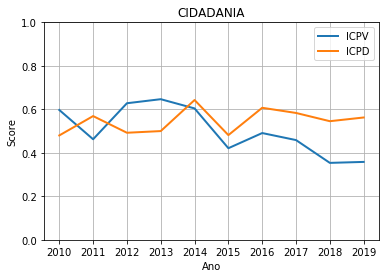

DEM
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4468756033604183 | 0.4043715846994536
2011 | 0.4970323886735433 | 0.417989417989418
2012 | 0.6299317097047601 | 0.4787234042553192
2013 | 0.5749103708949374 | 0.459016393442623
2014 | 0.5506588087406592 | 0.6
2015 | 0.4019330664373172 | 0.5737704918032787
2016 | 0.5147340354536937 | 0.4415584415584416
2017 | 0.3252501570471449 | 0.4871794871794872
2018 | 0.3811167087668148 | 0.43478260869565216
2019 | 0.3536968493075339 | 0.5


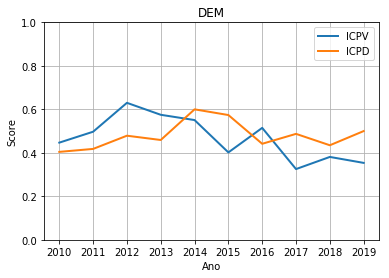

MDB
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4742856301476695 | 0.4979423868312757
2011 | 0.4069095774096917 | 0.4503311258278146
2012 | 0.493398094358285 | 0.5434782608695652
2013 | 0.4967545050486465 | 0.4341637010676157
2014 | 0.5275934090597372 | 0.6437768240343348
2015 | 0.3312469809673393 | 0.5373134328358209
2016 | 0.3829400156096566 | 0.4293785310734463
2017 | 0.27622500772959835 | 0.5492957746478874
2018 | 0.3187089832803726 | 0.5625
2019 | 0.3267585406637543 | 0.4482758620689655


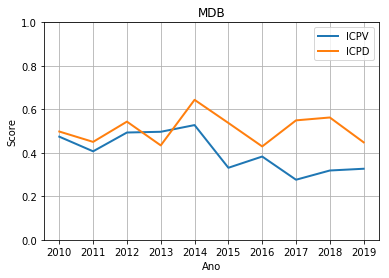

PCDOB
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4449555495851792 | 0.42105263157894735
2011 | 0.4601987913778217 | 0.5411764705882353
2012 | 0.7011182751037977 | 0.5609756097560976
2013 | 0.6192599864833784 | 0.5333333333333333
2014 | 0.5147074508025483 | 0.8205128205128205
2015 | 0.4663581241390482 | 0.5641025641025641
2016 | 0.4612142409978379 | 0.4313725490196079
2017 | 0.527743673441441 | 0.4230769230769231
2018 | 0.6932673939428793 | 0.3478260869565217
2019 | 0.4946652801180785 | 0.6388888888888888


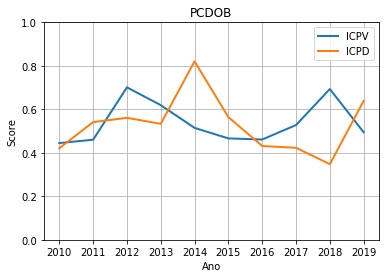

PDT
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.44958916099266943 | 0.5131578947368421
2011 | 0.27631652562834885 | 0.5051546391752577
2012 | 0.4882496585988356 | 0.4810126582278481
2013 | 0.4552364091872988 | 0.4390243902439024
2014 | 0.4968388896921439 | 0.6212121212121212
2015 | 0.33189241401991304 | 0.3970588235294117
2016 | 0.34582569200153296 | 0.5454545454545454
2017 | 0.42296774671102944 | 0.43478260869565216
2018 | 0.4954819063831665 | 0.5142857142857142
2019 | 0.3481551954598744 | 0.3611111111111111


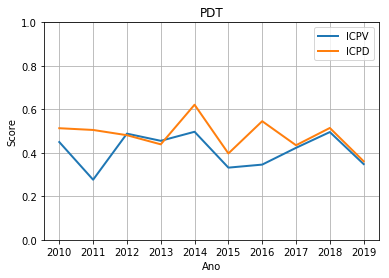

PHS
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4890079587212204 | 0.8571428571428571
2011 | 0.4064625850340136 | 1.0
2012 | 0.7478354978354979 | nan
2013 | 0.6684684684684685 | nan
2014 | 1.0 | nan
2015 | 0.4292256544202908 | 0.6
2016 | 0.39808105370104707 | 0.6666666666666666
2017 | 0.3797156545718972 | 0.8333333333333334
2018 | 0.1853252693281263 | 0.75
2019 | 0.3959036749892868 | nan


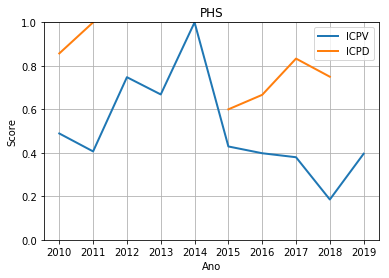

PL
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4939215089694397 | 0.6162790697674418
2011 | 0.4381432420249627 | 0.4114832535885167
2012 | 0.488280033909004 | 0.4491978609625669
2013 | 0.5105651994265755 | 0.3555555555555556
2014 | 0.5902318424927946 | 0.5196078431372549
2015 | 0.3088676756123368 | 0.5137614678899083
2016 | 0.3829331582242913 | 0.4361702127659575
2017 | 0.3127041271101843 | 0.4871794871794872
2018 | 0.278176816134906 | 0.4897959183673469
2019 | 0.3447369106601068 | 0.4545454545454545


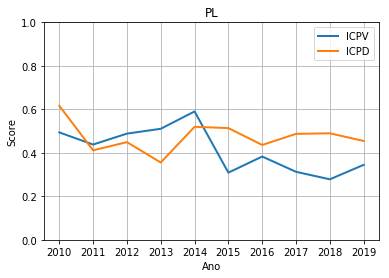

PMN
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4794719683608572 | 1.0
2011 | 0.4882885101081266 | 0.8
2012 | 0.7166666666666667 | nan
2013 | 0.5747866884279343 | 0.8
2014 | 0.4871113734750097 | nan
2015 | 0.3406308694190505 | 0.8333333333333334
2016 | 0.6428571428571429 | nan
2018 | 0.030303030303030307 | nan
2019 | 0.403987728621875 | nan


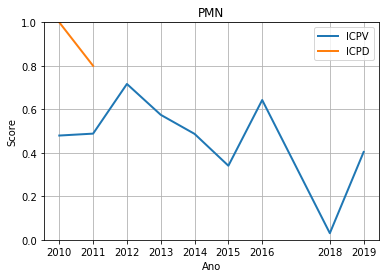

PP
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.5443442242944863 | 0.6031746031746031
2011 | 0.4127203218072814 | 0.4227642276422765
2012 | 0.5959363436570307 | 0.5153846153846153
2013 | 0.4528823771068475 | 0.3958333333333333
2014 | 0.590831559419298 | 0.7205882352941176
2015 | 0.2693933074353468 | 0.5058823529411764
2016 | 0.3696465105211748 | 0.4516129032258064
2017 | 0.32209949167027874 | 0.65625
2018 | 0.3514130860674751 | 0.4814814814814815
2019 | 0.3340734135893485 | 0.6


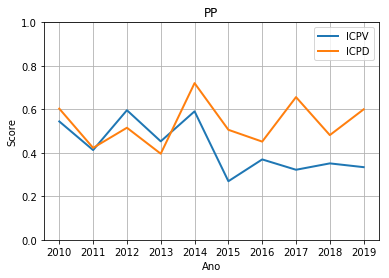

PSB
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4702640284341464 | 0.4507042253521127
2011 | 0.3903340504677085 | 0.5039370078740157
2012 | 0.6286431226242483 | 0.4341085271317829
2013 | 0.4959716173944164 | 0.4666666666666667
2014 | 0.5790481037932524 | 0.6951219512195121
2015 | 0.3148377808289557 | 0.6266666666666667
2016 | 0.4175346686586098 | 0.3793103448275862
2017 | 0.29872005938063256 | 0.4305555555555556
2018 | 0.3761490789622442 | 0.5
2019 | 0.22486170318085671 | 0.25842696629213485


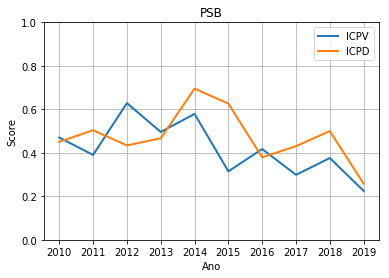

PSC
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.5185687814635732 | 0.6666666666666666
2011 | 0.4039895240889299 | 0.5384615384615384
2012 | 0.5838377353277638 | 0.6029411764705882
2013 | 0.5175226496530044 | 0.4230769230769231
2014 | 0.495530385655073 | 0.7222222222222222
2015 | 0.3284929112185414 | 0.6705882352941176
2016 | 0.3795402443027369 | 0.4358974358974359
2017 | 0.2861091772601748 | 0.8181818181818182
2018 | 0.3325618714823184 | 0.75
2019 | 0.3256935164194578 | nan


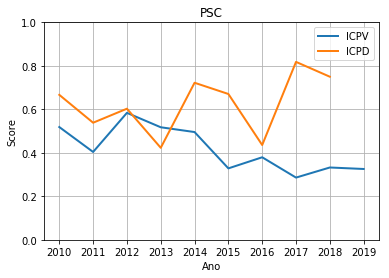

PSDB
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4963731442306051 | 0.4345238095238095
2011 | 0.6486359694200686 | 0.40782122905027934
2012 | 0.6267093893926973 | 0.5217391304347826
2013 | 0.5899209935636144 | 0.39864864864864863
2014 | 0.6425368027939615 | 0.5111111111111111
2015 | 0.452056207926974 | 0.6457399103139013
2016 | 0.5125323798073738 | 0.5
2017 | 0.3337808696157893 | 0.5333333333333333
2018 | 0.3625326211847571 | 0.5172413793103449
2019 | 0.2997605783731667 | 0.4117647058823529


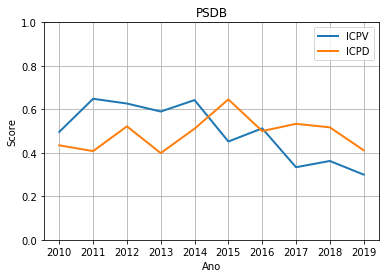

PSOL
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.6290545203588683 | 0.6
2011 | 0.557058161982183 | 0.52
2012 | 0.5593715860163229 | 0.4583333333333333
2013 | 0.6897263818006028 | 0.5294117647058824
2014 | 0.6647731353613707 | 0.8260869565217391
2015 | 0.4602972723935516 | 0.5555555555555556
2016 | 0.4237010800428849 | 0.6944444444444444
2017 | 0.681258016856197 | 0.5294117647058824
2018 | 0.8327767381288509 | 0.6923076923076923
2019 | 0.5594920190172831 | 0.4482758620689655


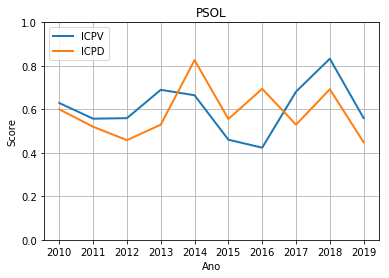

PT
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4877608204120496 | 0.4096692111959288
2011 | 0.4637915055701697 | 0.4230769230769231
2012 | 0.6949701604529239 | 0.4022082018927445
2013 | 0.6004003600435107 | 0.35974304068522484
2014 | 0.5717282512491371 | 0.6072351421188631
2015 | 0.40319873987414856 | 0.440625
2016 | 0.4680201379270144 | 0.4880952380952381
2017 | 0.4957982716208518 | 0.43478260869565216
2018 | 0.8018537006364979 | 0.39880952380952384
2019 | 0.4982514338247103 | 0.3283582089552239


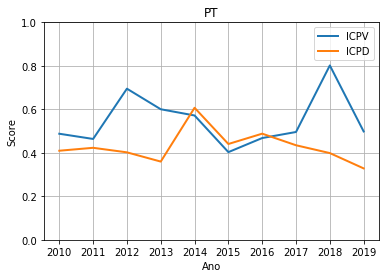

PTB
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4586619301659292 | 0.4466019417475728
2011 | 0.3892617778973271 | 0.584070796460177
2012 | 0.446128678672078 | 0.569620253164557
2013 | 0.4692346109527895 | 0.4912280701754386
2014 | 0.6100385747506182 | 0.5909090909090909
2015 | 0.2845644090824667 | 0.6551724137931034
2016 | 0.3550611237147408 | 0.6666666666666666
2017 | 0.263821226171883 | 0.75
2018 | 0.32830357514123576 | 0.6428571428571429
2019 | 0.3044715919377512 | 0.4615384615384616


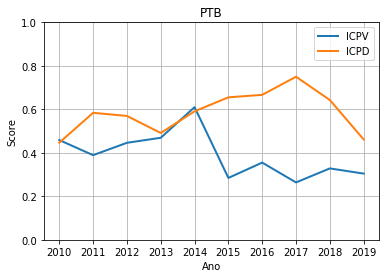

PTC
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.4699488491048594 | 0.5217391304347826
2015 | 0.3835496554988597 | nan
2016 | 0.75 | nan
2018 | 0.043478260869565216 | nan
2019 | 0.2826086956521739 | nan


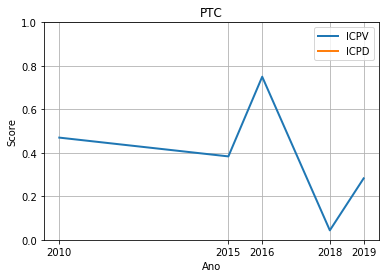

PV
Ano  | Score Votação      | Score Discursos GE  
2010 | 0.3617821215364192 | 0.6458333333333334
2011 | 0.3345743689809601 | 0.5238095238095238
2012 | 0.5208047792993612 | 0.5517241379310345
2013 | 0.4998701075339494 | 0.4222222222222222
2014 | 0.4468147311625572 | 0.6
2015 | 0.35502343364433464 | 0.6206896551724138
2016 | 0.44456470724949376 | 0.7777777777777778
2017 | 0.3848097046947043 | 0.5333333333333333
2018 | 0.4512188138658725 | 1.0
2019 | 0.3152502024160093 | nan


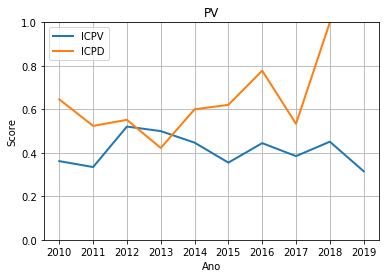

AVANTE
Ano  | Score Votação      | Score Discursos GE  
2011 | 0.4812572484986277 | 0.7777777777777778
2012 | 0.608507696007696 | 0.7142857142857143
2013 | 0.5681128747795414 | nan
2014 | 0.7256565656565658 | 1.0
2019 | 0.2682219468244376 | 0.5


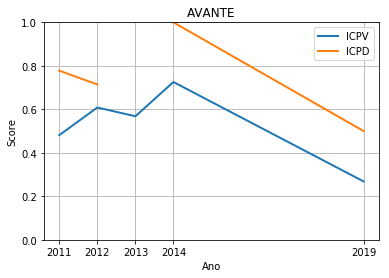

PRP
Ano  | Score Votação      | Score Discursos GE  
2011 | 0.5553846153846153 | nan
2012 | 0.5107376283846872 | 0.7777777777777778
2013 | 0.7144644979203805 | 0.5
2014 | 0.5756925958789313 | nan
2015 | 0.3632029523649972 | 1.0
2016 | 0.5320773470678593 | nan
2017 | 0.41108238167061695 | nan
2018 | 0.4171428571428572 | nan
2019 | 0.37478991596638656 | nan


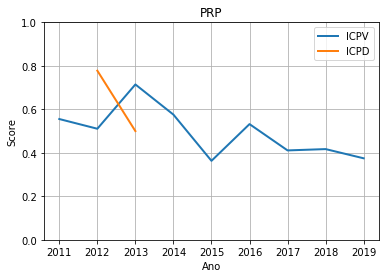

PRTB
Ano  | Score Votação      | Score Discursos GE  
2011 | 0.4788954635108481 | None
2012 | 0.7490196078431373 | None
2013 | 0.8666666666666667 | None
2014 | 0.8333333333333334 | None


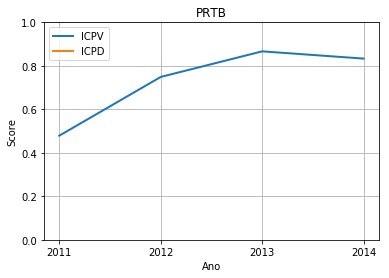

PODE
Ano  | Score Votação      | Score Discursos GE  
2012 | 0.0 | nan
2014 | 0.05555555555555555 | nan
2015 | 0.3051579229652163 | 0.7209302325581395
2016 | 0.30949673454000565 | 0.36666666666666653
2017 | 0.27836211276815626 | 0.6428571428571429
2018 | 0.3190802082964612 | 0.5
2019 | 0.30200275569310664 | 0.4117647058823529


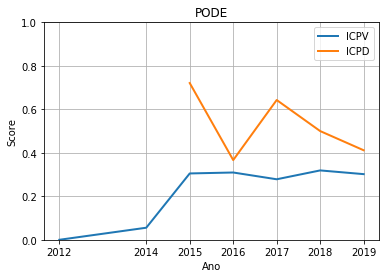

DC
Ano  | Score Votação      | Score Discursos GE  
2015 | 0.4582726369379583 | None
2016 | 0.75 | None
2018 | 0.3333333333333333 | None


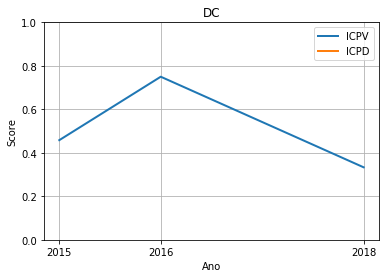

PATRI
Ano  | Score Votação      | Score Discursos GE  
2015 | 0.412901798575956 | 0.8
2016 | 0.4209137457524554 | nan
2017 | 0.3413665257331625 | nan
2018 | 0.30548893249633363 | nan
2019 | 0.365652574335082 | nan


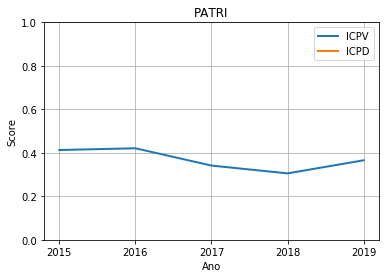

PROS
Ano  | Score Votação      | Score Discursos GE  
2015 | 0.28188022876233165 | 0.5
2016 | 0.4378961336080564 | 1.0
2017 | 0.2974351447646023 | 1.0
2018 | 0.2757293940829771 | 0.5714285714285714
2019 | 0.2656087545492064 | 0.8571428571428571


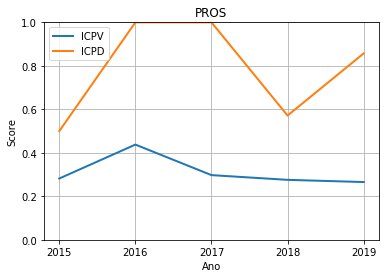

PSD
Ano  | Score Votação      | Score Discursos GE  
2015 | 0.3487042867161757 | 0.4827586206896552
2016 | 0.4121528737636638 | 0.5084745762711864
2017 | 0.3079327784910483 | 0.65
2018 | 0.29967340038367457 | 0.5135135135135135
2019 | 0.34324255026944744 | 0.2916666666666667


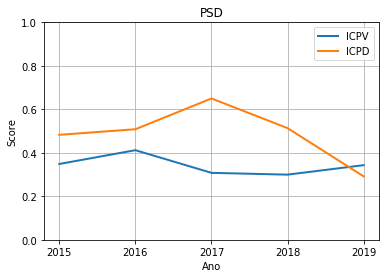

NOVO
Ano  | Score Votação      | Score Discursos GE  
2019 | 0.47786644543663703 | 0.5454545454545454


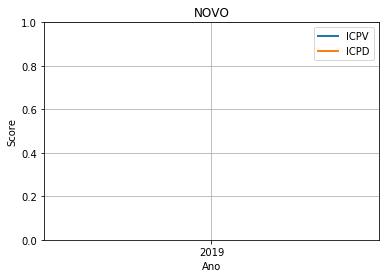

PRB
Ano  | Score Votação      | Score Discursos GE  
2019 | 0.4067201861290216 | 0.7142857142857143


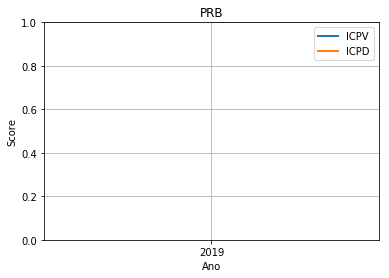

PSL
Ano  | Score Votação      | Score Discursos GE  
2019 | 0.4318789862540867 | 0.532258064516129


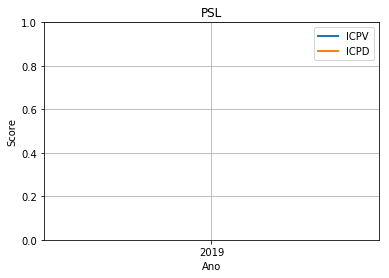

In [10]:
partidos = getQuery("""SELECT DISTINCT Partido from df""")
for i in partidos['Partido']:
    score_g = getQuery("SELECT Score_GE from df WHERE Partido='"+i+"'")['Score_GE'].tolist()
    anos = getQuery("SELECT Ano from df WHERE Partido='"+i+"'")['Ano'].tolist()
    rice = getQuery("SELECT Rice from df WHERE Partido='"+i+"'")['Rice'].tolist()
    print(i)
    print("Ano  | Score Votação      | Score Discursos GE  " )
    for x, y, z in zip(anos, rice, score_g):
        print(str(x), "|", y, "|", z)
    graficoPlot(i, rice, score_g, anos)

### Coesão partidária - Em 2019

In [13]:
partido = []
rice = []
siglas = ["PT", "PSL", "PP", "PSD", "MDB", "PR", "PSB", "PRB", "PSDB", "DEM", "PDT", "SOLIDARIEDADE", "PODE", "PSOL", "PTB", "PCDOB", "NOVO",  "PROS", "PSC", "PPS", "AVANTE", "PHS", "PATRI", "PV", "PRP", "PMN"]
for x, y in zip(df_2019v['Partido'], df_2019v['Rice']):
    if x in siglas:
        partido.append(x)
        rice.append(y)
        
df_plot = pd.DataFrame()
df_plot['Partido'] = partido
df_plot['Rice'] = rice

Gráfico de coesão partidária sobre os votos em 2019

Text(0, 0.5, 'Partidos')

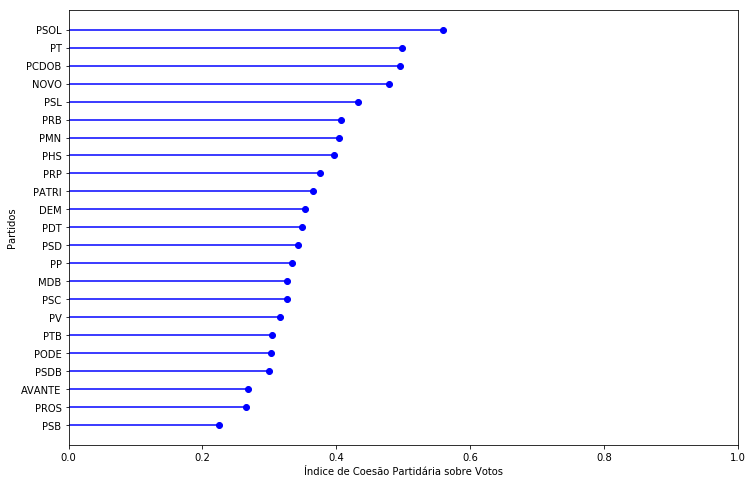

In [14]:
# Reorder it following the values:
ordered_df = df_plot.sort_values(by='Rice')
my_range=range(1,len(df_plot.index)+1)
 
import seaborn as sns
plt.figure(figsize = (12, 8))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Rice'], color='blue')
plt.plot(ordered_df['Rice'], my_range, "o", color='blue')
plt.xlim(0, 1)

# Add titles and axis names
plt.yticks(my_range, ordered_df['Partido'])
#plt.title("Coesão Partidária - votos", loc='left')
plt.xlabel('Índice de Coesão Partidária sobre Votos')
plt.ylabel('Partidos')

In [35]:
df_plot.sort_values(['Rice'], ascending=False)

,Partido,Rice
19,PSOL,0.559492
20,PT,0.498251
5,PCDOB,0.494665
3,NOVO,0.477866
18,PSL,0.431879
11,PRB,0.406720
8,PMN,0.403988
7,PHS,0.395904
13,PRP,0.374790
4,PATRI,0.365653


Verificando a distribuição gaussiana para o indicador

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'ICPV'),
 Text(0.5, 1.0, 'Densidade do Indicador de Coesão sobre Votos')]

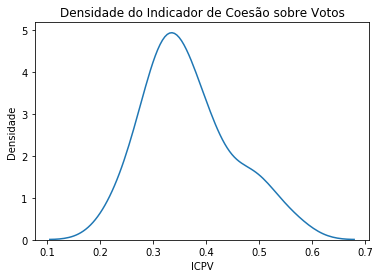

In [73]:
import seaborn as sns
ax = sns.distplot(df_plot['Rice'].tolist(), bins=10, kde=True, hist=False)
ax.set(xlabel='ICPV', ylabel='Densidade', title='Densidade do Indicador de Coesão sobre Votos')

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'ICPV'),
 Text(0.5, 1.0, 'Frequência e Densidade do Indicador de Coesão sobre Votos')]

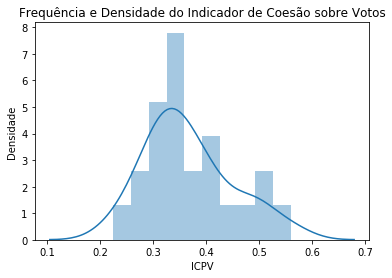

In [74]:
import seaborn as sns
ax = sns.distplot(df_plot['Rice'].tolist(), bins=10, kde=True, hist=True)
ax.set(xlabel='ICPV', ylabel='Densidade', title='Frequência e Densidade do Indicador de Coesão sobre Votos')

Coesão partidária - discursos - 2019

In [15]:
partido = []
score = []
siglas = ["PT", "PSL", "PP", "PSD", "MDB", "PR", "PSB", "PRB", "PSDB", "DEM", "PDT", "SOLIDARIEDADE", "PODE", "PSOL", "PTB", "PCDOB", "NOVO",  "PROS", "PSC", "PPS", "AVANTE", "PHS", "PATRI", "PV", "PRP", "PMN"]
for x, y in zip(df_2019c['Partido'], df_2019c['Score_GE']):
    if x in siglas:
        partido.append(x)
        score.append(y)
        
df_plot2 = pd.DataFrame()
df_plot2['Partido'] = partido
df_plot2['Score'] = score

Gráfico de coesão partidária sobre os discursos - 2019

Text(0, 0.5, 'Partidos')

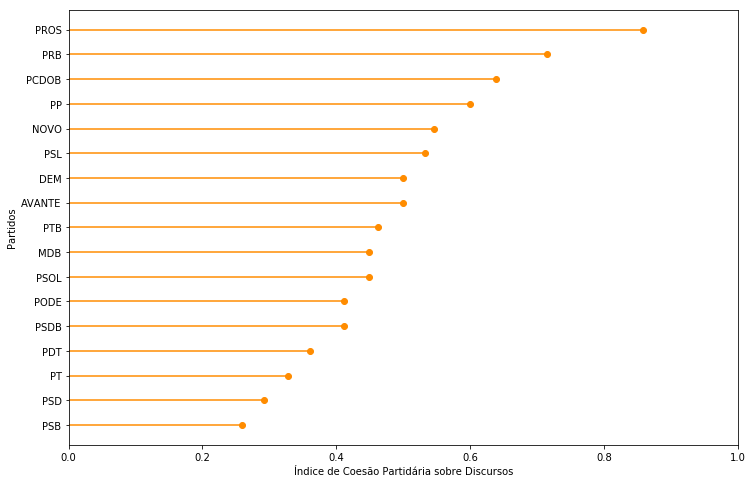

In [17]:
# Reorder it following the values:
ordered_df = df_plot2.sort_values(by='Score')
my_range=range(1,len(df_plot2.index)+1)
 
import seaborn as sns
plt.figure(figsize = (12, 8))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Score'], color='#FF8C00')
plt.plot(ordered_df['Score'], my_range, "o", color='#FF8C00')
plt.xlim(0, 1)

# Add titles and axis names
plt.yticks(my_range, ordered_df['Partido'])
#plt.title("Coesão Partidária - discursos", loc='left')
plt.xlabel('Índice de Coesão Partidária sobre Discursos')
plt.ylabel('Partidos')

In [36]:
df_plot2.sort_values(['Score'], ascending=False)

,Partido,Score
9,PROS,0.857143
8,PRB,0.714286
4,PCDOB,0.638889
7,PP,0.600000
3,NOVO,0.545455
13,PSL,0.532258
1,DEM,0.500000
0,AVANTE,0.500000
16,PTB,0.461538
2,MDB,0.448276


Verificando a distribuição gaussiana para o indicador

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'ICPD'),
 Text(0.5, 1.0, 'Densidade do Indicador de Coesão sobre Discursos')]

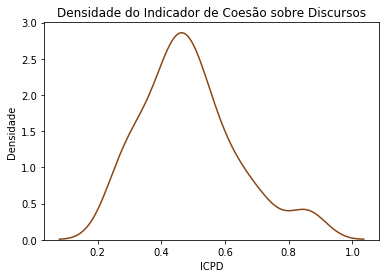

In [72]:
import seaborn as sns
ax = sns.distplot(df_plot2['Score'], bins=10, kde=True, hist=False, color='#8B4513')
ax.set(xlabel='ICPD', ylabel='Densidade', title='Densidade do Indicador de Coesão sobre Discursos')

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'ICPD'),
 Text(0.5, 1.0, 'Frequência e Densidade do Indicador de Coesão sobre Discursos')]

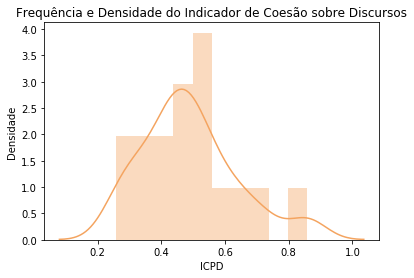

In [71]:
import seaborn as sns
ax = sns.distplot(df_plot2['Score'], bins=10, kde=True, hist=True, color='#F4A460')
ax.set(xlabel='ICPD', ylabel='Densidade', title='Frequência e Densidade do Indicador de Coesão sobre Discursos')

In [18]:
lista1 = df_plot['Partido'].tolist()
lista2 = df_plot2['Partido'].tolist()

list2 = []
lista2.sort()
for i in lista2:
    list2.append(i)

list1 = []
lista1.sort()
for x in lista1:
    list1.append(x)

print("votos ->", list1)
print("discursos ->", list2)
print("")
for x in list1:
    if x not in list2:
        print("Partido", x, "não contém índice de coesão por discursos")

for x in list2:
    if x not in list1:
        print("Partido", x, "não contém índice de coesão por votos")

votos -> ['AVANTE', 'DEM', 'MDB', 'NOVO', 'PATRI', 'PCDOB', 'PDT', 'PHS', 'PMN', 'PODE', 'PP', 'PRB', 'PROS', 'PRP', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSL', 'PSOL', 'PT', 'PTB', 'PV']
discursos -> ['AVANTE', 'DEM', 'MDB', 'NOVO', 'PCDOB', 'PDT', 'PODE', 'PP', 'PRB', 'PROS', 'PSB', 'PSD', 'PSDB', 'PSL', 'PSOL', 'PT', 'PTB']

Partido PATRI não contém índice de coesão por discursos
Partido PHS não contém índice de coesão por discursos
Partido PMN não contém índice de coesão por discursos
Partido PRP não contém índice de coesão por discursos
Partido PSC não contém índice de coesão por discursos
Partido PV não contém índice de coesão por discursos


In [27]:
df_2019_agrupado = pd.merge(df_plot2, df_plot)
df_2019_agrupado = df_2019_agrupado.sort_values(['Score'])
df_2019_agrupado.head()

,Partido,Score,Rice
10,PSB,0.258427,0.224862
11,PSD,0.291667,0.343243
15,PT,0.328358,0.498251
5,PDT,0.361111,0.348155
12,PSDB,0.411765,0.299761


In [28]:
#df_2019_agrupado = pd.merge(df_2019c, df_2019v)
#df_2019_agrupado.head()

Plotando gráficos de barras comparativos entre os indicadores

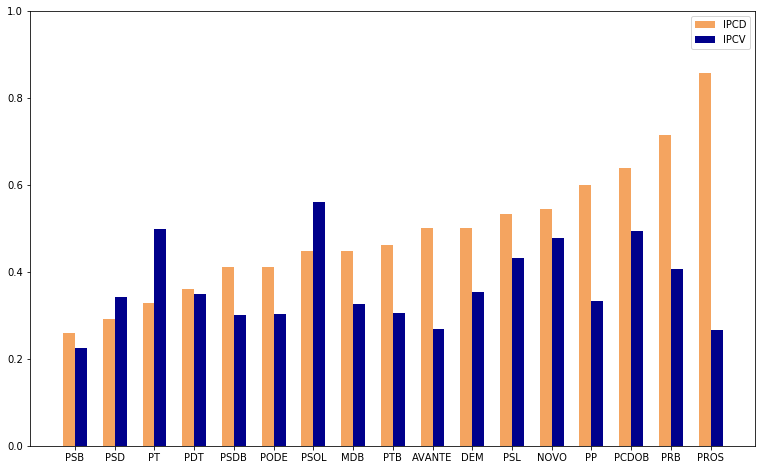

In [39]:
import numpy as np
#labels = list1
labels = df_2019_agrupado['Partido'].tolist()
ind = np.arange(len(labels))
width = 0.3

plt.figure(figsize = (13, 8))

bar_08 = plt.bar(ind, df_2019_agrupado['Score'].tolist(), width, color='#F4A460', label="IPCD")
bar_18 = plt.bar(ind+width, df_2019_agrupado['Rice'].tolist(), width, color='darkblue', label="IPCV")

location = ind+width/2
labels=labels
plt.xticks(location, labels)
plt.ylim(0, 1)
plt.legend()

In [63]:
df_2019_agrupado['Diferenca'] = df_2019_agrupado['Score'] - df_2019_agrupado['Rice']
df_2019_agrupado = df_2019_agrupado.sort_values(['Diferenca'], ascending=False)
df_2019_agrupado

,Partido,Score,Rice,Diferenca
9,PROS,0.857143,0.265609,0.591534
8,PRB,0.714286,0.406720,0.307566
7,PP,0.600000,0.334073,0.265927
0,AVANTE,0.500000,0.268222,0.231778
16,PTB,0.461538,0.304472,0.157067
1,DEM,0.500000,0.353697,0.146303
4,PCDOB,0.638889,0.494665,0.144224
2,MDB,0.448276,0.326759,0.121517
12,PSDB,0.411765,0.299761,0.112004
6,PODE,0.411765,0.302003,0.109762


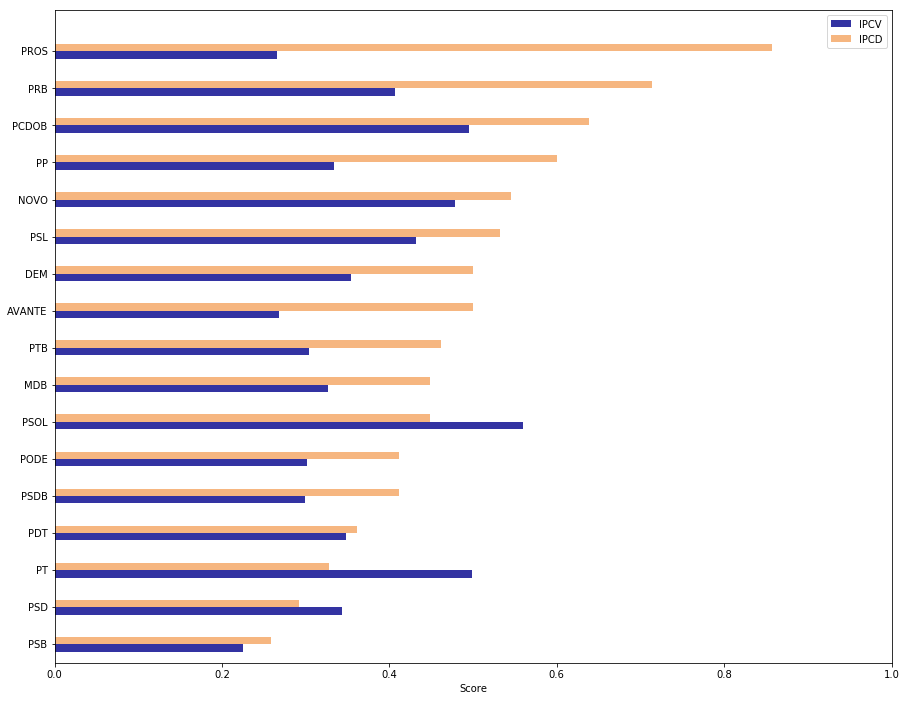

In [30]:
partido = df_2019_agrupado['Partido'].tolist()
use = df_2019_agrupado['Score'].tolist()
use2 = df_2019_agrupado['Rice'].tolist()

ind = np.arange(len(partido))
width=0.2 

plt.figure(figsize = (15, 12))

ax = plt.subplot(111)
ax.barh(ind - width, use2, width, align='center', alpha=0.8, color='darkblue', label='IPCV') 
ax.barh(ind, use, width, align='center', alpha=0.8, color='#F4A460', label='IPCD') 
ax.set(yticks=ind - width/2, yticklabels=partido, ylim=[2*width - 1, len(partido)])
plt.xlabel('Score')
plt.xlim(0, 1)
#plt.title('Coesão partidária')
plt.legend()
plt.show()